# **Under Stand the dataset:**

In [ ]:
# /content/drive/MyDrive/NOVA_AI/dataset.json

In [9]:
import pandas as pd
df=pd.read_json("/content/drive/MyDrive/NOVA_AI/dataset.json")
df.head()

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival


In [67]:
import pandas as pd

# Step 1: Read JSON data into a Pandas DataFrame
download = pd.read_json("/content/drive/MyDrive/NOVA_AI/dataset.json")

# Step 3: Save the DataFrame to a CSV file
download.to_csv("/content/drive/MyDrive/NOVA_AI/dataset.csv", index=False)

# Optionally, you can download the CSV file
from google.colab import files
files.download("/content/drive/MyDrive/NOVA_AI/dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
len(df)

1222

In [11]:
print("\nDataset shape:", df.shape)


Dataset shape: (1222, 2)


In [12]:
print("\nBasic information about the DataFrame:")
print(df.info())


Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   externalStatus  1222 non-null   object
 1   internalStatus  1222 non-null   object
dtypes: object(2)
memory usage: 19.2+ KB
None


In [13]:
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
externalStatus    0
internalStatus    0
dtype: int64


In [14]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       externalStatus    internalStatus
count            1222              1222
unique            108                15
top          Gate out  Loaded on Vessel
freq              144               331


# **EDA(Exploratory Data Analysis)**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

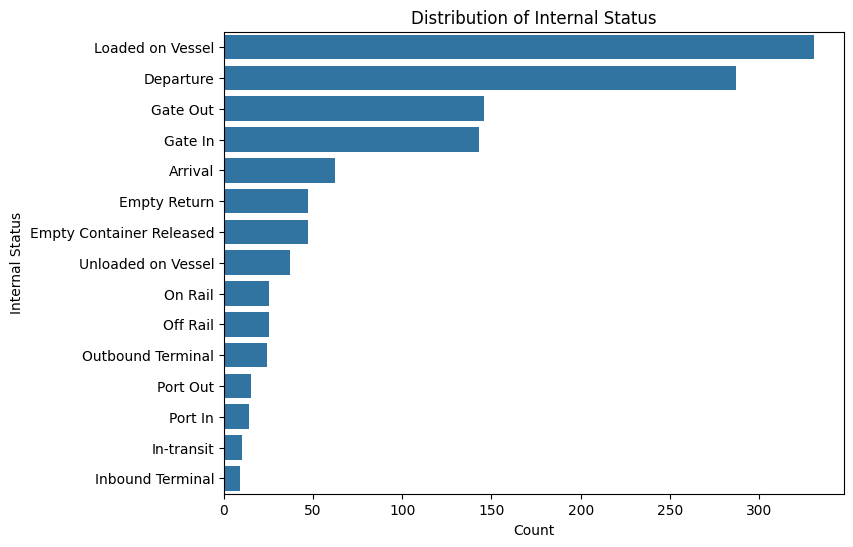

In [16]:
# Visualize the distribution of internalStatus
plt.figure(figsize=(8, 6))
sns.countplot(y='internalStatus', data=df, order=df['internalStatus'].value_counts().index)
plt.title('Distribution of Internal Status')
plt.xlabel('Count')
plt.ylabel('Internal Status')
plt.show()

# **Data Processing:**

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [31]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
df['externalStatus_processed'] = df['externalStatus'].apply(preprocess_text)
df['internalStatus_processed'] = df['internalStatus'].apply(preprocess_text)


In [33]:
df.head()

,externalStatus,internalStatus,externalStatus_processed,internalStatus_processed
0,PORT OUT,Port Out,port,port
1,TERMINAL IN,Inbound Terminal,terminal,inbound terminal
2,PORT IN,Port In,port,port
3,Vessel departure from first POL (Vessel name :...,Departure,vessel departure first pol vessel name tian fu,departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival,vessel arrival final pod vessel name tian fu,arrival


# **Model Building:**

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Preprocess the data
X = df['externalStatus']
y = df['internalStatus']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Tokenize and encode the input data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Convert sparse matrix to dense array
X = X.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine input shape
input_shape = X_train.shape[1]

# Build the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
28/28 [==============================] - 2s 22ms/step - loss: 2.3461 - accuracy: 0.5563 - val_loss: 1.9164 - val_accuracy: 0.7551
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 1.4811 - accuracy: 0.7327 - val_loss: 1.0848 - val_accuracy: 0.7755
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 0.8552 - accuracy: 0.8043 - val_loss: 0.6627 - val_accuracy: 0.8061
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 0.5280 - accuracy: 0.8680 - val_loss: 0.4379 - val_accuracy: 0.8571
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 0.3515 - accuracy: 0.9170 - val_loss: 0.2980 - val_accuracy: 0.9082
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9477 - val_loss: 0.1960 - val_accuracy: 0.9082
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.1684 - accuracy: 0.9647 - val_loss: 0.1346 - val_accuracy: 0.9898
Epoch 8/100


In [68]:
print(X_train.shape, y_train.shape)

(977, 145) (977,)


# **Model Training and Evaluation:**

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.9959183673469387
Precision: 0.996232339089482
Recall: 0.9959183673469387
F1-score: 0.9957732426303855


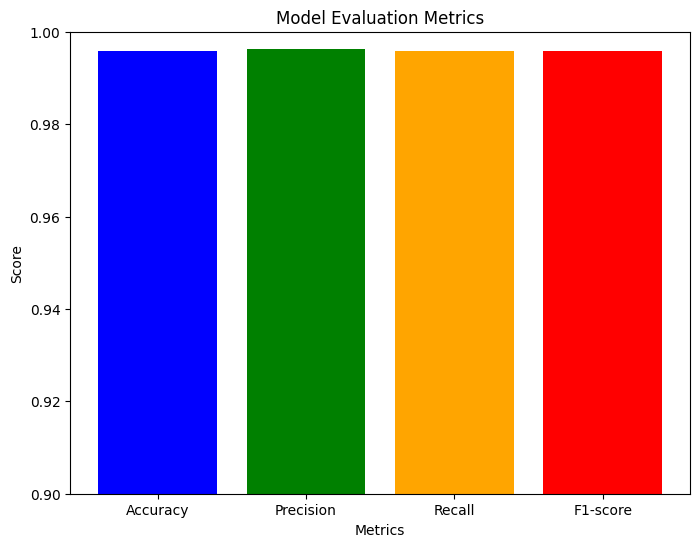

In [52]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.9, 1)  # Set y-axis limit to better visualize differences
plt.show()

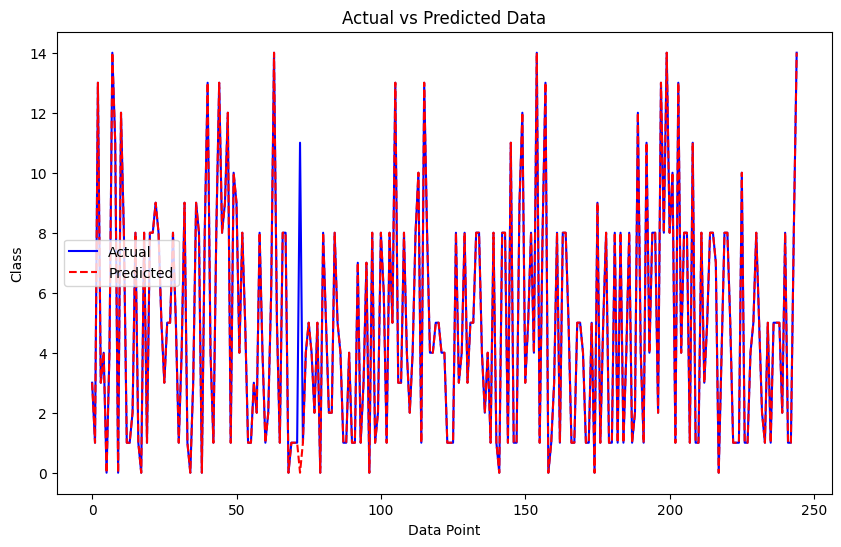

In [54]:
# Plot actual vs predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_classes, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Data')
plt.xlabel('Data Point')
plt.ylabel('Class')
plt.legend()
plt.show()

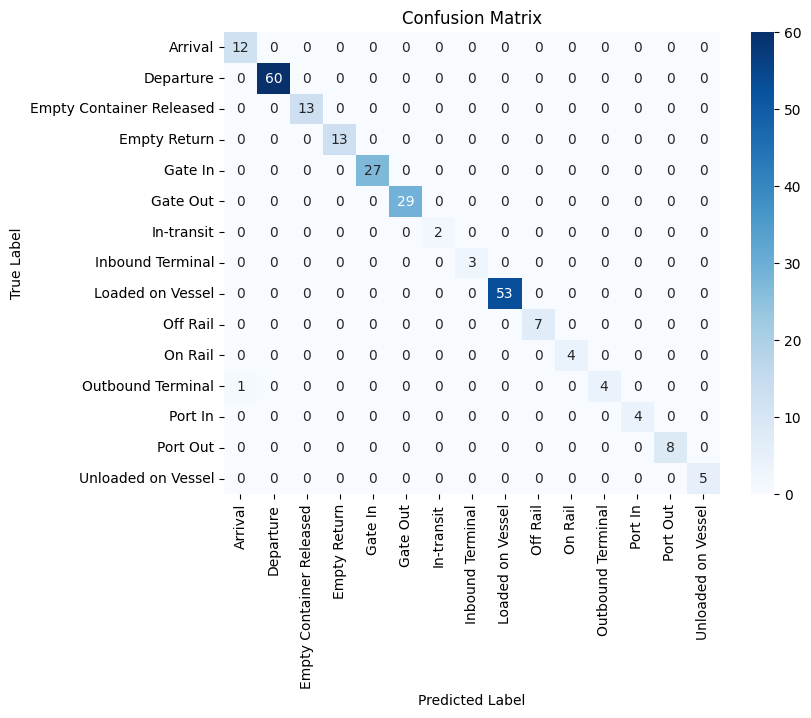

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
import joblib
joblib.dump(model, "trained_model.pkl")
print("Dump Successfull:")

Dump Successfull:


In [66]:
from google.colab import files

# Save the model
joblib.dump(model, "trained_model.pkl")
print("Model saved successfully.")

# Download the saved model file
files.download("trained_model.pkl")

Model saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>